In [21]:
#pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf

C:\Users\Hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#pip install graphviz

In [4]:
#pip install imblearn


In [5]:
df= pd.read_csv('Sentiment_Analysis_Data.csv')

In [6]:
df.head()

,Unnamed: 0,Index,Title,Author,ID,Created,Original_Title,Without_stopwords,Lemmatized_Words,Pos_tags,...,PCA1,PCA2,For_Cluster_Seven,For_Cluster_Ten,neg,neu,pos,compound,Sentiment,Sentiment_Label
0,0,0,"['apple', 'vision', 'pro', 'has', 'ruined', 'm...",Old_Possible8977,1an21fb,2024-02-09 23:34:09,Apple Vision Pro has ruined movies for me,"['apple', 'vision', 'pro', 'ruined', 'movies']","['apple', 'vision', 'pro', 'ruined', 'movies']","[('[', 'JJ'), (""'apple"", 'NNP'), (""'"", 'POS'),...",...,0.369651,0.018061,0,1,0.279,0.541,0.18,-0.2732,-1,negative
1,1,1,"['its', 'too', 'expensive', 'no', 'regrets']",McNerdsAlot,1akdyzo,2024-02-06 16:35:52,It’s too expensive. No regrets.,"['expensive', 'regrets']","['expensive', 'regrets']","[('[', 'RB'), (""'expensive"", 'JJ'), (""'"", ""''""...",...,-0.054405,-0.046932,1,5,0.610,0.390,0.00,-0.5719,-1,negative
2,2,2,"['how', 'to', 'ruin', 'your', 'movie', 'library']",Mequbbal_Trader,1atvcqx,2024-02-18 14:31:17,How to ruin your movie library,"['ruin', 'movie', 'library']","['ruin', 'movie', 'library']","[('[', 'JJ'), (""'ruin"", 'NNP'), (""'"", 'POS'), ...",...,-0.068477,-0.067856,1,5,0.432,0.568,0.00,-0.5859,-1,negative
3,3,3,"['i', 'was', 'really', 'wrong', 'about', 'the'...",AppleBottmBeans,1amtycf,2024-02-09 17:45:25,I was REALLY wrong about the AVP. This is the ...,"['really', 'wrong', 'avp', 'incredible', 'piec...","['really', 'wrong', 'avp', 'incredible', 'piec...","[('[', 'RB'), (""'really"", 'RB'), (""'"", ""''""), ...",...,-0.113431,0.092884,4,9,0.205,0.795,0.00,-0.6281,-1,negative
4,4,4,"['apple', 'vision', 'pro', 'is', 'the', 'best'...",Deathtosnoopy,1b2jq3m,2024-02-28 22:35:12,Apple vision pro is the best thing to happen t...,"['apple', 'vision', 'pro', 'best', 'thing', 'h...","['apple', 'vision', 'pro', 'best', 'thing', 'h...","[('[', 'JJ'), (""'apple"", 'NNP'), (""'"", 'POS'),...",...,0.209062,-0.007999,0,1,0.000,0.640,0.36,0.7351,1,positive


In [7]:
# Split the data into features (X) and labels (y)
X = df['Lemmatized_Words']
y = df['Sentiment_Label']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#X_train.to_csv('Training_Data_DT.csv')

In [10]:
#X_test.to_csv('Test_Data_DT.csv')

In [11]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [12]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_counts, y_train)

In [13]:
def values_to_numpy(values):
    # Define a mapping from labels to numbers
    label_map = {'positive': 1, 'negative': -1}
    
    # Convert labels to numerical values
    numerical_values = [label_map[value.strip()] for value in values]
    
    # Convert to NumPy array
    numpy_array = np.array(numerical_values)
    
    return numpy_array

In [14]:
values = y_train_resampled

y_train_resampled_array = values_to_numpy(values)
print(y_train_resampled_array)

[ 1  1  1 ... -1 -1 -1]


In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_counts.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

C:\Users\Hp\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(X_train_resampled.toarray(), y_train_resampled_array, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6287 - loss: 0.6760 - val_accuracy: 0.0000e+00 - val_loss: 0.6148
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6029 - loss: 0.5857 - val_accuracy: 0.0000e+00 - val_loss: 0.4132
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6164 - loss: 0.3848 - val_accuracy: 0.0000e+00 - val_loss: -0.2966
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5798 - loss: -0.0667 - val_accuracy: 0.0000e+00 - val_loss: -2.0643
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5489 - loss: -0.9168 - val_accuracy: 0.0000e+00 - val_loss: -5.0597
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5115 - loss: -2.3325 - val_accuracy: 0.0000e+00 - val_loss: -10.3386
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4987 - loss: -4.9124 - val_accuracy: 0.0000e+00 - val_loss: -18.2418
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4881 - loss: -8

In [29]:
y_pred_prob = model.predict(X_test_counts.toarray())

# Convert probabilities to class labels based on a threshold (0.5 in this case)
y_pred = (y_pred_prob > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [30]:
values_2 = y_test

y_test_array = values_to_numpy(values_2)
print(y_test_array)

[ 1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1
  1  1  1  1 -1  1  1  1]


In [31]:
loss, accuracy = model.evaluate(X_test_counts.toarray(), y_test_array)
print("Test Accuracy:", accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3222 - loss: 15.6662
Test Accuracy: 0.3449999988079071


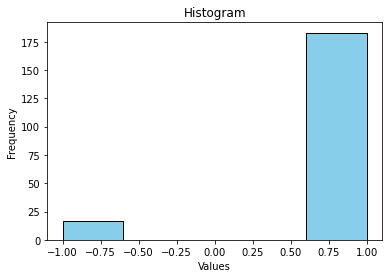

In [27]:
plt.hist(y_test_array, bins=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the plot
plt.show()

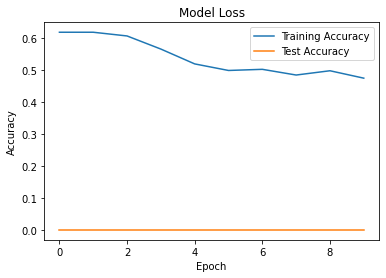

In [34]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Loss')
plt.legend()
plt.show()